In [79]:
#참고
# https://www.tensorflow.org/tutorials/keras/regression?hl=ko
# https://www.kaggle.com/code/ktakuma/boston-house-prices-dnn-regression
# https://www.kaggle.com/code/systemvaz/house-prices-with-tensorflow-dnn

In [1]:
import numpy as np
import pandas as pd 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.layers import BatchNormalization

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [83]:
# seaborn 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab/houseprac1/sl_o.csv')
print(df.shape)
df.head()

(3591649, 12)


,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),보증금(만원),월세(만원),층,구분,한국은행기준금리,종가,년도,건물나이
0,0,9,0,77.75,33000,0,2.0,0,2.5,1941.15,2014.0,26.0
1,0,9,0,79.97,34000,0,2.0,0,2.5,1941.15,2014.0,27.0
2,0,9,0,79.97,28000,0,1.0,0,2.5,1941.15,2014.0,27.0
3,0,9,0,79.97,35000,0,2.0,0,2.5,1941.15,2014.0,27.0
4,0,9,1,104.43,40000,40,8.0,0,2.5,1941.15,2014.0,30.0


In [3]:
df['환산_보증금_월세'] = df.apply(lambda x: x['보증금(만원)'] + x['월세(만원)']*12*20, axis='columns')
df = df.drop(['보증금(만원)','월세(만원)'], axis=1)
df.head()

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,한국은행기준금리,종가,년도,건물나이,환산_보증금_월세
0,0,9,0,77.75,2.0,0,2.5,1941.15,2014.0,26.0,33000.0
1,0,9,0,79.97,2.0,0,2.5,1941.15,2014.0,27.0,34000.0
2,0,9,0,79.97,1.0,0,2.5,1941.15,2014.0,27.0,28000.0
3,0,9,0,79.97,2.0,0,2.5,1941.15,2014.0,27.0,35000.0
4,0,9,1,104.43,8.0,0,2.5,1941.15,2014.0,30.0,49600.0


<Axes: >

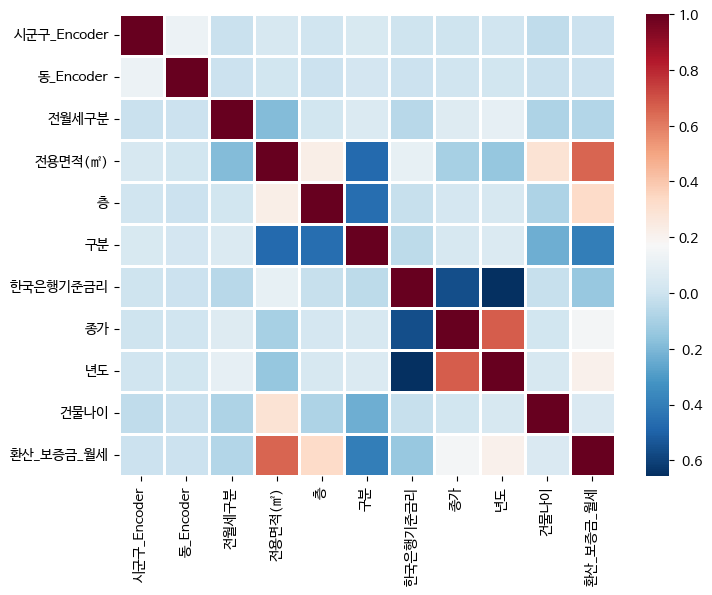

In [84]:
import warnings
warnings.filterwarnings('ignore')

# Show correlation matrix
corr = df.corr()

# Show headmap
plt.figure(figsize=(8,6))
plt.rc('font', family='NanumBarunGothic')  #한글깨짐방지
sns.heatmap(corr,cmap='RdBu_r',linewidth=1)

In [117]:
# train_dataset = df.sample(frac=0.8,random_state=0)
# test_dataset = df.drop(train_dataset.index)

In [ ]:
# train_dataset.head()

In [ ]:
# test_dataset.head()

In [4]:
X = df.drop('환산_보증금_월세', axis=1)
y = df['환산_보증금_월세']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [145]:
X_train

,시군구_Encoder,동_Encoder,전월세구분,전용면적(㎡),층,구분,한국은행기준금리,종가,년도,건물나이
2535875,3,383,1,43.0500,3.0,2,1.50,1994.15,2016.0,14.0
1685509,1,7,1,39.9000,10.0,0,1.25,2087.96,2019.0,10.0
1160542,20,369,0,208.4780,5.0,0,0.50,2326.17,2020.0,9.0
2098018,0,54,0,60.6800,1.0,2,1.25,2160.23,2017.0,24.0
2319416,24,119,0,12.8700,5.0,2,1.25,2016.19,2016.0,5.0
...,...,...,...,...,...,...,...,...,...,...
341423,11,145,0,114.9855,2.0,0,2.50,1996.96,2013.0,9.0
151481,0,300,0,82.3000,12.0,0,2.50,1985.61,2014.0,30.0
1432620,17,133,0,18.0700,13.0,1,1.75,2140.67,2019.0,0.0
559648,19,251,0,59.9600,17.0,0,3.25,2030.25,2012.0,13.0


In [146]:
y_train

2535875     14700.0
1685509      7299.0
1160542    320000.0
2098018     25000.0
2319416      6000.0
             ...   
341423      45000.0
151481      33000.0
1432620     17000.0
559648      17000.0
2261120     26800.0
Name: 환산_보증금_월세, Length: 2693736, dtype: float64

In [ ]:
# train_stats = train_dataset.describe()
# train_stats = train_stats.transpose()
# train_stats

In [104]:
# 예측할 레이블
# train_labels = train_dataset.pop('환산_보증금_월세')
# test_labels = test_dataset.pop('환산_보증금_월세')

In [ ]:
# train_dataset

In [ ]:
# train_labels

In [108]:
# # 정규화
# def norm(x):
#   return (x - train_stats['mean']) / train_stats['std']
# normed_train_data = norm(train_dataset)
# normed_test_data = norm(test_dataset)

# normed_train_data = normed_train_data.drop('환산_보증금_월세', axis=1)
# normed_test_data = normed_test_data.drop('환산_보증금_월세', axis=1)

In [ ]:
# normed_test_data

In [110]:
# 모델 만들기
# def build_model():
#   model = keras.Sequential([
#     layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
#     layers.Dense(64, activation='relu'),
#     layers.Dense(1)
#   ])

#   optimizer = tf.keras.optimizers.RMSprop(0.001)

#   model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
#   return model

In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(10,)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu', ))
model.add(BatchNormalization())
# model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

model.compile(loss='mse', optimizer=Adam(learning_rate=0.01), metrics=['mae'])

# Set EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=500)

In [111]:
# model = build_model()

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               1

In [ ]:
# example_batch = X_train[:10]
# example_result = model.predict(example_batch)
# example_result

In [8]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_split=0.2, batch_size=32, verbose=1) #verbose 1이어야 로그나옴 0이면 안나옴 멍청아

Epoch 1/50
67344/67344 [==============================] - 276s 4ms/step - loss: 258662768.0000 - mae: 9789.2842 - val_loss: 65532719104.0000 - val_mae: 38778.7930
Epoch 2/50
67344/67344 [==============================] - 308s 5ms/step - loss: 203024576.0000 - mae: 8834.1494 - val_loss: 12654576926720.0000 - val_mae: 123084.3359
Epoch 3/50
67344/67344 [==============================] - 280s 4ms/step - loss: 194646352.0000 - mae: 8735.7236 - val_loss: 10194613538622799872.0000 - val_mae: 9003994.0000
Epoch 4/50
67344/67344 [==============================] - 265s 4ms/step - loss: 192083920.0000 - mae: 8709.4648 - val_loss: 4220468854784.0000 - val_mae: 16082.3887
Epoch 5/50
67344/67344 [==============================] - 285s 4ms/step - loss: 186975056.0000 - mae: 8607.7852 - val_loss: 43360366592.0000 - val_mae: 8591.8857
Epoch 6/50
67344/67344 [==============================] - 284s 4ms/step - loss: 184427440.0000 - mae: 8558.7432 - val_loss: 292964392184578048.0000 - val_mae: 192828496.

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,val_loss,val_mae,epoch
45,145483792.0,7729.576660,1.686600e+15,1.866906e+05,45
46,144634704.0,7712.274902,1.071922e+12,1.381564e+04,46
47,144584992.0,7706.941406,3.872050e+16,5.711191e+05,47
48,144989952.0,7712.410645,1.213148e+16,2.897817e+05,48
49,144730080.0,7704.547852,3.091119e+17,2.029551e+06,49


In [15]:
Y_test_hat = model.predict(X_test).ravel().astype(int)


28060/28060 [==============================] - 51s 2ms/step


In [16]:
hat_s = Y_test_hat[1000:1020]
s = y_test[1000:1020]

<Figure size 1000x600 with 0 Axes>

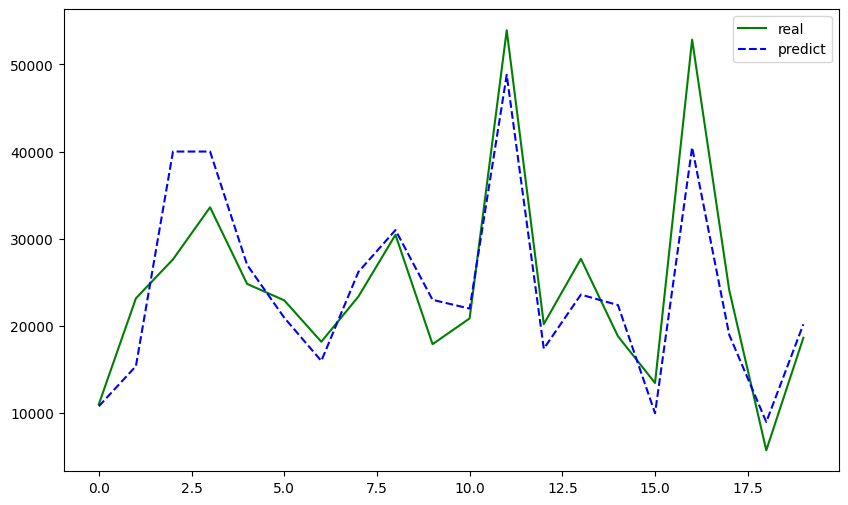

<Figure size 1000x600 with 0 Axes>

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(np.arange(20), hat_s, '-',color = 'green', label='real')
plt.plot(np.arange(20), s, '--', color = 'blue', label='predict')
plt.legend()
plt.figure()

In [18]:
test_loss, test_mae = model.evaluate(X_test, y_test)
print('loss:{:.3f}\nmae: {:.3f}'.format(test_loss, test_mae))

28060/28060 [==============================] - 54s 2ms/step - loss: 185460364333285376.0000 - mae: 1174222.5000
loss:185460364333285376.000
mae: 1174222.500


28060/28060 [==============================] - 52s 2ms/step


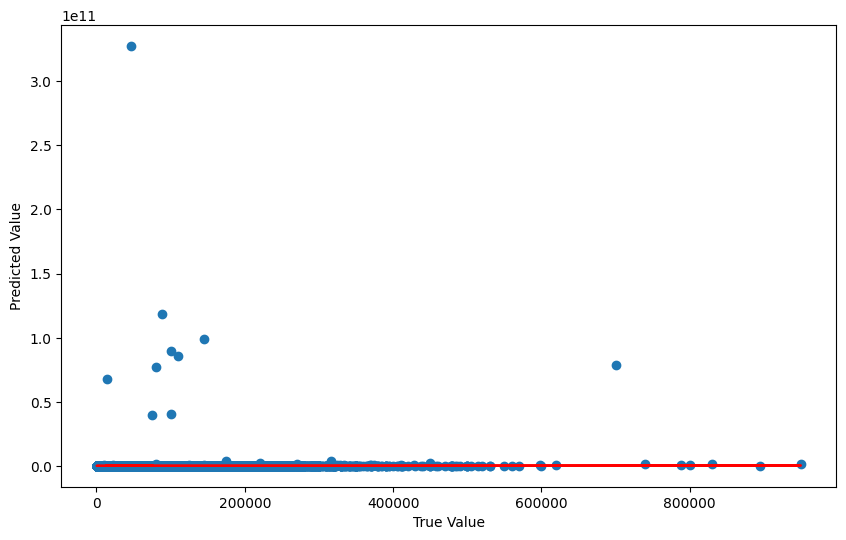

In [19]:
y_pred = model.predict(X_test).flatten()
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()
# ???????????뭐고

In [25]:
y_test

2519119    13000.0
278912     13220.0
3096309    27814.0
875676     36200.0
385950     14000.0
            ...   
536223     67000.0
567332     13500.0
3094218    23000.0
1659721    11300.0
3568534    75900.0
Name: 환산_보증금_월세, Length: 897913, dtype: float64

In [26]:
y_pred

array([14094.771, 14492.99 , 30490.371, ..., 33366.18 , 13159.906,
       63695.754], dtype=float32)

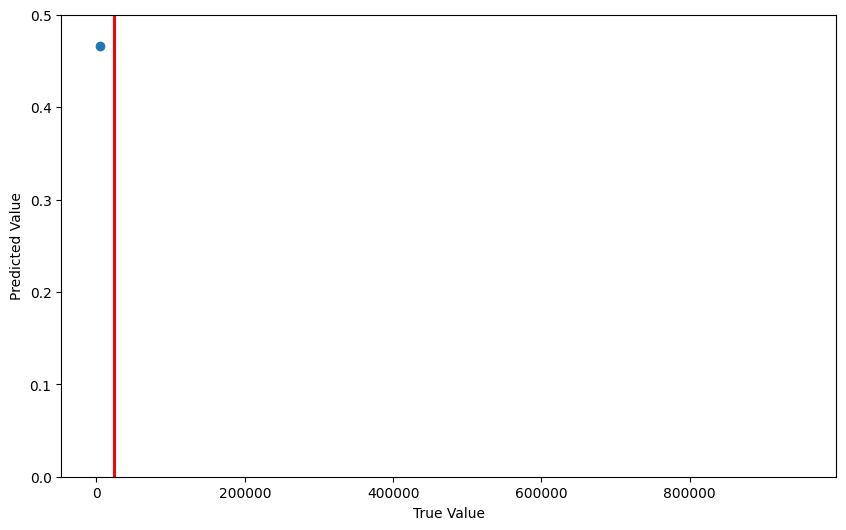

In [30]:
# 범위조절함
# y_pred = model.predict(X_test).flatten()
p = np.polyfit(y_test, y_pred, 1)
f = np.poly1d(p)

plt.scatter(y_test, y_pred)
plt.plot(y_test, f(y_test), color = "r", label="Ism")
plt.rcParams['agg.path.chunksize'] = 100000 #에러떠서
plt.ylim([0,0.5])
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.show()
#??????????????????????? 머고